## SQL
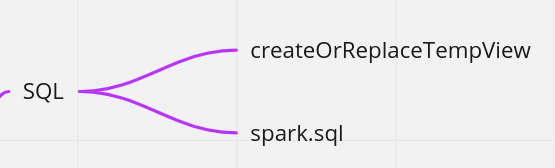

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )


# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York")
        ,("Bob", 30, "San Francisco")
        ,("Charlie", 35, "Chicago")
        ,("Anderson", 40, "Chicago")]
df = spark.createDataFrame(data, schema)

# Show the DataFrame
df.show()

## [createOrReplaceTempView](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.createOrReplaceTempView.html)

DataFrame.createOrReplaceTempView(name: str) → None

Creates or replaces a local temporary view with this DataFrame.

The lifetime of this temporary table is tied to the SparkSession that was used to create this DataFrame.

In [ ]:
# Registra o DataFrame como uma tabela temporária
df.createOrReplaceTempView("table")


## [sql](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.sql.html)

SparkSession.sql(sqlQuery: str, **kwargs: Any) → pyspark.sql.dataframe.DataFrame

Returns a DataFrame representing the result of the given query. When kwargs is specified, this method formats the given string by using the Python standard formatter.

In [ ]:
# Executa a consulta SQL
resultado = spark.sql("SELECT city, MAX(age) AS maior_idade FROM table GROUP BY city")

resultado.show()